In [1]:
import spacy
import pandas as pd
import numpy as np
from collections import Counter
from string import punctuation
import joblib
import re
import matplotlib.pyplot as plt

In [6]:
nlp = spacy.load('fr_core_news_sm')

In [7]:
nlp.Defaults.stop_words

{'a',
 'abord',
 'afin',
 'ah',
 'ai',
 'aie',
 'ainsi',
 'ait',
 'allaient',
 'allons',
 'alors',
 'anterieur',
 'anterieure',
 'anterieures',
 'apres',
 'après',
 'as',
 'assez',
 'attendu',
 'au',
 'aucun',
 'aucune',
 'aujourd',
 "aujourd'hui",
 'aupres',
 'auquel',
 'aura',
 'auraient',
 'aurait',
 'auront',
 'aussi',
 'autre',
 'autrement',
 'autres',
 'autrui',
 'aux',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avoir',
 'avons',
 'ayant',
 'bas',
 'basee',
 'bat',
 "c'",
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-là',
 'cent',
 'cependant',
 'certain',
 'certaine',
 'certaines',
 'certains',
 'certes',
 'ces',
 'cet',
 'cette',
 'ceux',
 'ceux-ci',
 'ceux-là',
 'chacun',
 'chacune',
 'chaque',
 'chez',
 'ci',
 'cinq',
 'cinquantaine',
 'cinquante',
 'cinquantième',
 'cinquième',
 'combien',
 'comme',
 'comment',
 'compris',
 'concernant',
 'c’',
 

In [8]:
def get_keyword(text):
    res = list()
    pos_tag = ['VERB','ADJ','NOUN','PROPN']
    doc = nlp(text.lower())
    for token in doc:
        
        if (token.text in nlp.Defaults.stop_words) or (token.text in punctuation) or (len(token.text) == 1):
            pass
        elif token.pos_ in pos_tag:
            res.append(token.text)
    
    return res
    
    

In [9]:
df = joblib.load(open('cleaned_working_basis_sections.joblib','rb'))

In [10]:
df.head()

,index,titres,section_html,num_etude,section_clean_1,section_clean_wc
1,1,1.1. Présentation du groupe URBASOLAR,"</span></h5>\n<p><span class=""font45"">La Socié...",100689,la societe urba est une societe de projet qui ...,1639
3,3,1.2.1. Les Appels d'Offres,"</span></h5></li></ul>\n<p><span class=""font45...",100689,le groupe urbasolar est un des principaux laur...,199
4,4,1.2.2. Les Centrales au Sol,"</span></h5>\n</div><br clear=""all"">\n<div><im...",100689,parc solaire avec trackers mwc vallerargues fo...,301
8,8,1. DESCRIPTION DU PROJET.,"</span></a></p></li></ul>\n<ul style=""list-sty...",100689,historique du site caracteristiques physique d...,4459
9,9,1.1. Localisation du projet,"</span></h5></li></ul>\n<p><a name=""bookmark41...",100689,le projet de parc photovoltaique au sol se sit...,341


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11319 entries, 1 to 21767
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             11319 non-null  int64 
 1   titres            11319 non-null  object
 2   section_html      11319 non-null  object
 3   num_etude         11319 non-null  int64 
 4   section_clean_1   11319 non-null  object
 5   section_clean_wc  11319 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 619.0+ KB


In [29]:
re.findall(r'\w+',df['section_clean_1'].values[0])

['la',
 'societe',
 'urba',
 'est',
 'une',
 'societe',
 'de',
 'projet',
 'qui',
 'a',
 'ete',
 'creee',
 'par',
 'urbasolar',
 'pour',
 'porter',
 'le',
 'projet',
 'de',
 'la',
 'centrale',
 'photovoltaique',
 'de',
 'saint',
 'yriex',
 'la',
 'perche',
 'la',
 'societe',
 'urba',
 'est',
 'detenue',
 'a',
 'par',
 'urbasolar',
 'le',
 'dossier',
 'de',
 'permis',
 'de',
 'construire',
 'la',
 'reponse',
 'a',
 'l',
 'appel',
 'd',
 'offres',
 'de',
 'la',
 'commission',
 'de',
 'regulation',
 'de',
 'l',
 'energie',
 'cre',
 'ainsi',
 'que',
 'toutes',
 'les',
 'demandes',
 'd',
 'autorisations',
 'administratives',
 'et',
 'electriques',
 'seront',
 'deposees',
 'au',
 'nom',
 'd',
 'urba',
 'urbasolar',
 'est',
 'un',
 'groupe',
 'francais',
 'independant',
 'majoritairement',
 'detenu',
 'par',
 'ses',
 'dirigeants',
 'fondateurs',
 'er',
 'pure',
 'player',
 'francais',
 'du',
 'photovoltaique',
 'dont',
 'l',
 'ambition',
 'est',
 'de',
 'contribuer',
 'significativement',
 'a

In [31]:
'Il est il est elle est  elle est'.lower().count('il')

2

In [154]:
def tf_idf_compute(term,section,corpus):
    
    section_split = re.findall(r'\w+',section)
    term_count_section  = section.count(term)
    n = len(section_split)
    tf = np.log(1 + term_count_section/n)
    
    term_count_corpus = sum([1 if term in sec else 0 for sec in corpus])
    N = len(corpus)
    idf = np.log(N/term_count_corpus)
    
    return (tf,idf,tf*idf)

In [46]:
tf_idf_compute('photovoltaique',df['section_clean_1'].values[0],df['section_clean_1'].values)

4.751889168765743


(0.006082743815769108, 1.5585422587171747, 0.009480213285826712)

In [63]:
tf_idf = pd.DataFrame(None,columns=['Term','TF','IDF','TF_IDF'])

In [64]:
import tqdm

In [86]:
n_section = 0
section = df['section_clean_1'].values[n_section]
corpus = df['section_clean_1'].values
for term in tqdm.auto.tqdm(set(re.findall(r'\w+',section))) :
    tf_idf_scores = tf_idf_compute(term,
                                   section,
                                   corpus)
    
    
    tf_idf = tf_idf.append({'Term':term,
                           'TF':tf_idf_scores[0],
                           'IDF': tf_idf_scores[1],
                           'TF_IDF':tf_idf_scores[2]},
                          ignore_index=True)
    

  0%|          | 0/634 [00:00<?, ?it/s]

In [70]:
keywords = dict()
for row in tf_idf.sort_values(by='TF_IDF',ascending=False).head(15).values:
    keywords[row[0]]=row[3]
    
print(keywords)
    

{'urbasolar': 0.05099875117273496, 'urba': 0.01481443689472657, 'contractant': 0.012665523883602998, 'sol': 0.011606503511347815, 'centrale': 0.010369277263047783, 'professionnel': 0.01014861837129492, 'pv': 0.009892857451273161, 'photovoltaique': 0.009480213285826712, 'entreprise': 0.00923460453172015, 'urbozolur': 0.008507360093813136, 'professionnelle': 0.008033689797510755, 'aqpv': 0.007918853232785421, 'universites': 0.007371412783764727, 'client': 0.007165108590366244, 'societal': 0.006979797944231357}


In [149]:
def tf_idf_keyword_extractor(corpus,n_section,n_keywords=5):
    
    tf_idf = pd.DataFrame(None,columns=['Term','TF','IDF','TF_IDF'])
    section = corpus[n_section]
    
    for term in tqdm.auto.tqdm(set(re.findall(r'\w+',section))) :
        tf_idf_scores = tf_idf_compute(term,
                                       section,
                                       corpus)


        tf_idf = tf_idf.append({'Term':term,
                               'TF':tf_idf_scores[0],
                               'IDF': tf_idf_scores[1],
                               'TF_IDF':tf_idf_scores[2]},
                              ignore_index=True)
    
    keywords = dict()
    for row in tf_idf.sort_values(by='TF_IDF',ascending=False).head(n_keywords).values:
        keywords[row[0]]=row[3]
    
    return keywords
    
    
    
    
    

In [1]:
df['section_clean_1'].values[0]

NameError: name 'df' is not defined

In [155]:
tf_idf_keyword_extractor(corpus=df['section_clean_1'].values,n_section=0,n_keywords=5)

  0%|          | 0/634 [00:00<?, ?it/s]

{'urbasolar': 0.05099875117273496,
 'urba': 0.01481443689472657,
 'contractant': 0.012665523883602998,
 'sol': 0.011606503511347815,
 'centrale': 0.010369277263047783}

In [77]:
import nltk

In [118]:
section_split = re.findall(r'\w+',df['section_clean_1'].values[0])
pd.Series(nltk.ngrams(section_split,2)).value_counts()

(de, la)                    15
(de, l)                     13
(l, entreprise)              9
(et, de)                     6
(sur, les)                   5
                            ..
(projets, sont)              1
(quotidien, nous)            1
(immobilier, industriel)     1
(leurs, realisations)        1
(equipes, de)                1
Length: 1371, dtype: int64

In [158]:
def tf_idf_compute_ng(n_gram,section,corpus,n_g):
    
    section_split = re.findall(r'\w+',section)
    section_split_ng = list(nltk.ngrams(section_split,n=n_g))
    ngram_count_section  = section_split_ng.count(n_gram)
    
    n = len(section_split_ng)
    tf = np.log(1 + ngram_count_section/n)
    
    ngram_count_corpus = sum([1 if n_gram in list(nltk.ngrams(re.findall(r'\w+',sec),n=n_g)) 
                              else 0 for sec in corpus])
    N = len(corpus)
    idf = np.log(N/ngram_count_corpus)
    
    return (tf,idf,tf*idf)

In [134]:
list(nltk.ngrams(section_split,n=2)).count(('de', 'la'))

15

In [142]:
tf_idf_compute_ng(('de', 'la'),
                  df['section_clean_1'].values[0],
                  df['section_clean_1'],2)

0.009115833408009413 tf


  0%|          | 0/11319 [00:00<?, ?it/s]

(0.009115833408009413, 0.3017093779723638, 0.0027503324272302133)

In [129]:
sum([1 if ('de', 'terres') in list(nltk.ngrams(re.findall(r'\w+',sec),n=2)) 
                              else 0 for sec in tqdm.auto.tqdm( df['section_clean_1'][:1000])])

  0%|          | 0/1000 [00:00<?, ?it/s]

90

In [151]:
def tf_idf_keyword_extractor_ng(corpus,n_section,n_g,n_keywords=5):
    
    tf_idf = pd.DataFrame(None,columns=['Term','TF','IDF','TF_IDF'])
    section = corpus[n_section]
    section_split = re.findall(r'\w+',section)
    section_split_ng = set(list(nltk.ngrams(section_split,n=n_g)))
    print
    
    
    for ngram in tqdm.auto.tqdm(section_split_ng) :
        tf_idf_scores = tf_idf_compute_ng(ngram,
                                       section,
                                       corpus,n_g)


        tf_idf = tf_idf.append({'Term':term,
                               'TF':tf_idf_scores[0],
                               'IDF': tf_idf_scores[1],
                               'TF_IDF':tf_idf_scores[2]},
                              ignore_index=True)
    
    keywords = dict()
    for row in tf_idf.sort_values(by='TF_IDF',ascending=False).head(n_keywords).values:
        keywords[row[0]]=row[3]
    
    return keywords
    

In [159]:
tf_idf_keyword_extractor_ng(df['section_clean_1'].values,0,1,n_keywords=5)

  0%|          | 0/634 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [10]:
import seaborn as sns

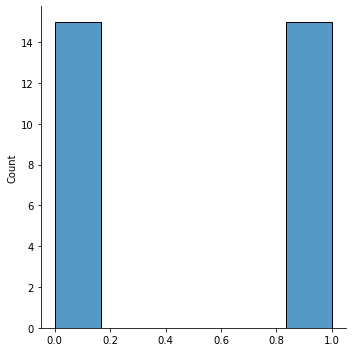

In [17]:
sample = list()
for i in range(30):
    sample.append(np.random.randint(0,2))
sns.displot(sample)